# Tugas Besar IF2220 Probabilitas dan Statistika Penarikan Kesimpulan dan Pengujian Hipotesis

## M Farrel Danendra Rachim 13521048
## Ammar Rasyad Chaeroel 13521136

<u>**Setting Up Data**</u>



In [ ]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py
from scipy import stats
import seaborn as sns
import math
from statsmodels.stats.proportion import *

# Baca file .csv
df = pd.read_csv('anggur.csv')

# Drop semua baris yang mengandung NULL
dfNoNull = df.dropna()


<u>**Analisis 1**</u>

Menulis deskripsi statistika \(*Descriptive Statistics*\) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.



In [ ]:
print("Mean")
print("======================================")
print(dfNoNull.mean(numeric_only=True))
print("")
print("Median")
print("======================================")
print(dfNoNull.median(numeric_only=True))
print("")
print("Modus")
print("======================================")
print(dfNoNull.mode(numeric_only=True).iloc[0]) # Ambil nilai pertama saja dari nilai modus tiap kolom
print("")
print("Standar Deviasi")
print("======================================")
print(dfNoNull.std(numeric_only=True))
print("")
print("Variansi")
print("======================================")
print(dfNoNull.var(numeric_only=True))
print("")
print("Range")
print("======================================")
print(dfNoNull.max(numeric_only=True) - dfNoNull.min(numeric_only=True))
print("")
print("Min")
print("======================================")
print(dfNoNull.min(numeric_only=True))
print("")
print("Max")
print("======================================")
print(dfNoNull.max(numeric_only=True))
print("")
print("Q1")
print("======================================")
print(dfNoNull.quantile(.25, numeric_only=True))
print("")
print("Q3")
print("======================================")
print(dfNoNull.quantile(.75, numeric_only=True))
print("")
print("IQR")
print("======================================")
print(dfNoNull.quantile(.75, numeric_only=True) - dfNoNull.quantile(.25, numeric_only=True))
print("")
print("Skew")
print("======================================")
print(dfNoNull.skew(numeric_only=True))
print("")
print("Kurtosis")
print("======================================")
print(dfNoNull.kurt(numeric_only=True))
print("")

Mean
fixed acidity            7.152530
volatile acidity         0.520839
citric acid              0.270517
residual sugar           2.567104
chlorides                0.081195
free sulfur dioxide     14.907679
total sulfur dioxide    40.290150
density                  0.995925
pH                       3.303610
sulphates                0.598390
alcohol                 10.592280
quality                  7.958000
dtype: float64

Median
fixed acidity            7.150000
volatile acidity         0.524850
citric acid              0.272200
residual sugar           2.519430
chlorides                0.082167
free sulfur dioxide     14.860346
total sulfur dioxide    40.190000
density                  0.996000
pH                       3.300000
sulphates                0.595000
alcohol                 10.610000
quality                  8.000000
dtype: float64

Modus
fixed acidity            6.540000
volatile acidity         0.554600
citric acid              0.301900
residual sugar           0.03255

<u>**Analisis 2**</u>

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.



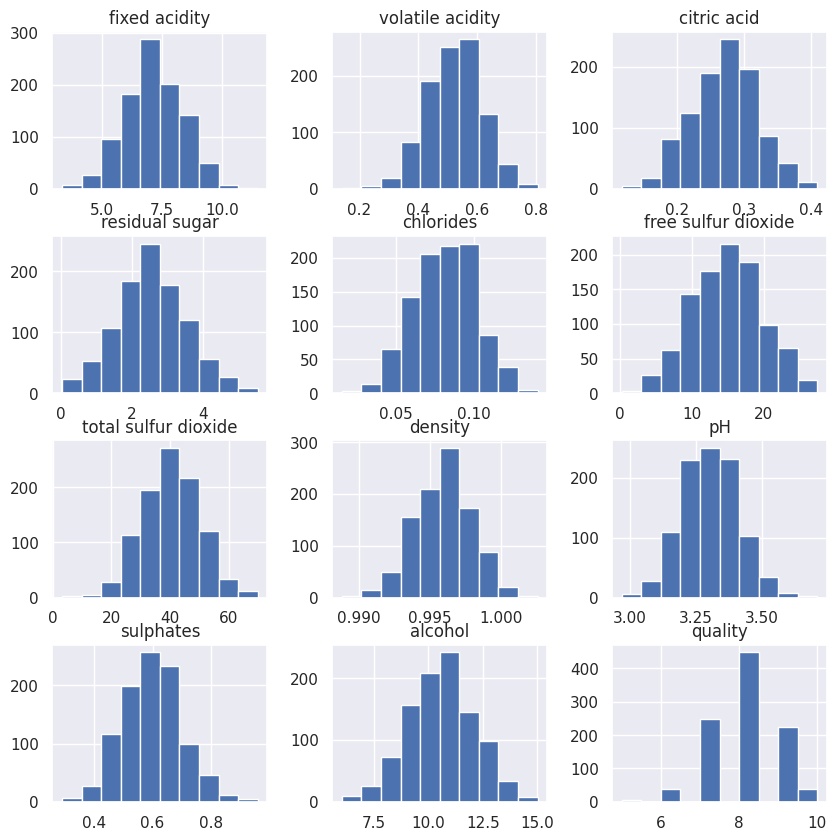

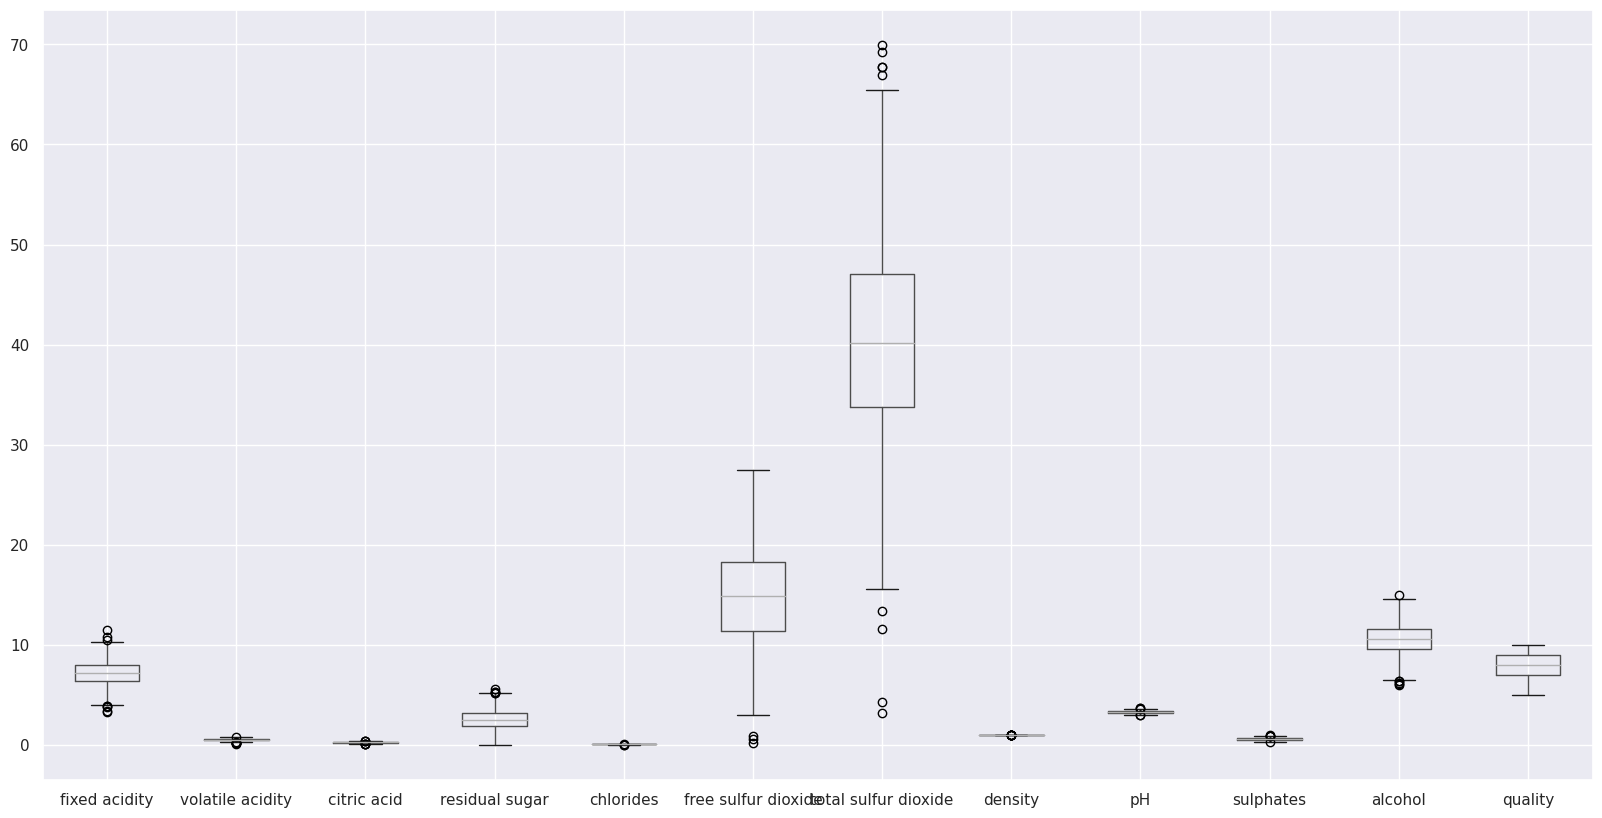

In [ ]:
# Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

# Histogram
dfNoNull.hist(figsize=(10,10))
plt.show()

# Boxplot
dfNoNull.boxplot(figsize=(20,10))
plt.show()

<u>**Analisis 3**</u>

Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.


Terdapat beberapa pilihan normality test yang dapat digunakan, namun kami menggunakan Shapiro\-Wilk test. Dari test ini akan diperoleh dua nilai: statistic dan p\-value. Jika p\-value &gt; 0.05, dapat diasumsikan bahwa distribusi kolom numerik normal.



fixed acidity
Shapiro-Wilk test result:
statistics = 0.9990411401, p = 0.8935267925
Probably normally distributed



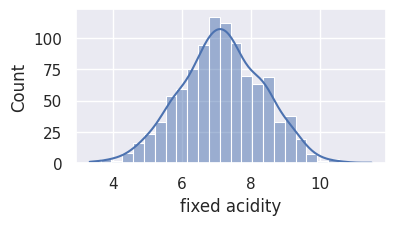


volatile acidity
Shapiro-Wilk test result:
statistics = 0.9970286489, p = 0.0599304363
Probably normally distributed



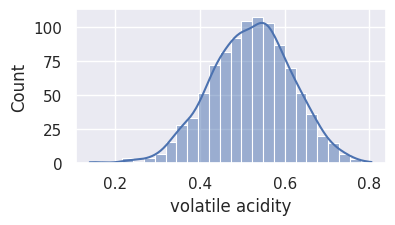


citric acid
Shapiro-Wilk test result:
statistics = 0.9979573488, p = 0.2652290761
Probably normally distributed



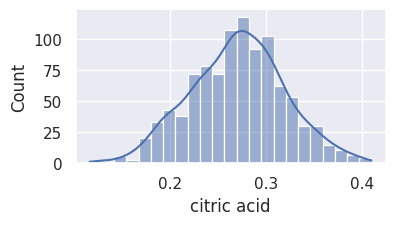


residual sugar
Shapiro-Wilk test result:
statistics = 0.9968547225, p = 0.0449186452
Probably not normally distributed



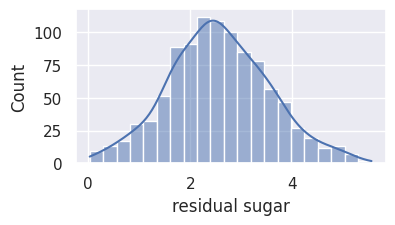


chlorides
Shapiro-Wilk test result:
statistics = 0.9976862073, p = 0.1746553034
Probably normally distributed



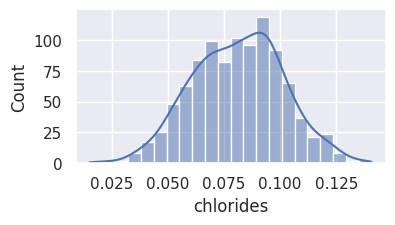


free sulfur dioxide
Shapiro-Wilk test result:
statistics = 0.9968221784, p = 0.0425582714
Probably not normally distributed



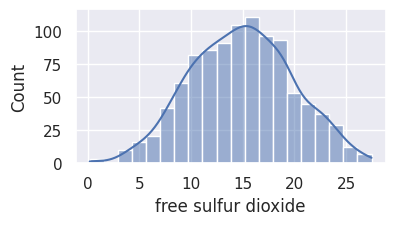


total sulfur dioxide
Shapiro-Wilk test result:
statistics = 0.9984723926, p = 0.5367269516
Probably normally distributed



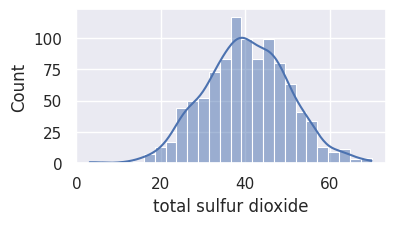


density
Shapiro-Wilk test result:
statistics = 0.9989627004, p = 0.8533204794
Probably normally distributed



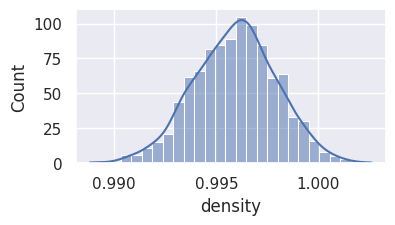


pH
Shapiro-Wilk test result:
statistics = 0.9975344539, p = 0.1371351629
Probably normally distributed



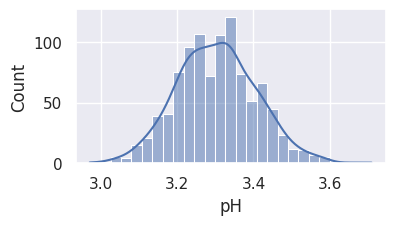


sulphates
Shapiro-Wilk test result:
statistics = 0.9974099994, p = 0.1121428311
Probably normally distributed



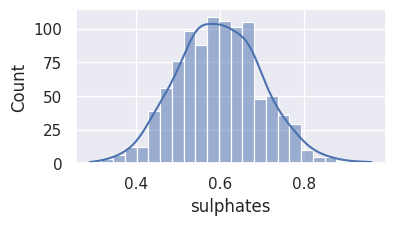


alcohol
Shapiro-Wilk test result:
statistics = 0.9984460473, p = 0.5198704004
Probably normally distributed



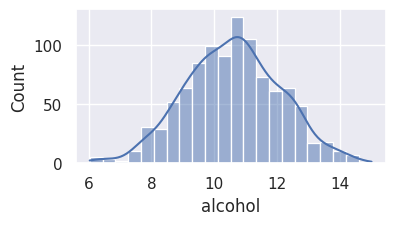


quality
Shapiro-Wilk test result:
statistics = 0.8955030441, p = 0.0000000000
Probably not normally distributed



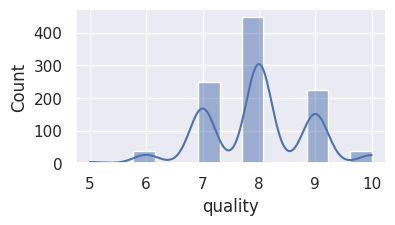

In [ ]:
# Mengatur style histogram menggunakan library seaborn
sns.set_style("darkgrid")

for column in dfNoNull:
    # Iterasi seluruh kolom numerik
    print(column)
    print("======================================")

    # Implementasikan Shapiro-Wilk test
    statistics, p = stats.shapiro(dfNoNull[column])
    print("Shapiro-Wilk test result:")
    print("statistics = %.10f, p = %.10f" %(statistics, p))
    if (p > 0.05):
        print("Probably normally distributed")
    else:
        print("Probably not normally distributed")
    print("")

    # Memvisualisasikan histogram
    sns.set(rc={"figure.figsize":(4, 2)})
    sns.histplot(data=dfNoNull, x=column, kde=True)
    plt.show()
    print("")

<u>**Analisis 4**</u>

Melakukan test hipotesis 1 sampel,

a. Nilai rata\-rata pH di atas 3.29?

b. Nilai rata\-rata Residual Sugar tidak sama dengan 2.50?

c. Nilai rata\-rata 150 baris pertama kolom sulphates bukan 0.65?

d. Nilai rata\-rata total sulfur dioxide di bawah 35?

e. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50%?



<u>**4a**</u>

Nilai rata-rata pH di atas 3.29?


1.   H0: Rata-rata pH = 3.29
2.   H1: Rata-rata pH > 3.29
3. α = 0.05
4. Metode yang digunakan adalah 1-sample t\-test secara one-sided karena ingin membandingkan rata\-rata sebuah sampel dengan sebuah nilai tertentu, apakah nilai rata-rata tersebut lebih besar atau tidak. Digunakan nilai t<sub>α</sub> = 1.645. Critical region: t > 1.645
5. t: 4.1037807933651145, p: 2.197958306386009e-05
6. Tolak H0

Jadi, nilai rata-rata pH di atas 3.29.

t: 4.1037807933651145, p: 2.197958306386009e-05
Nilai uji di dalam daerah kritis
H0 ditolak, H1 diterima



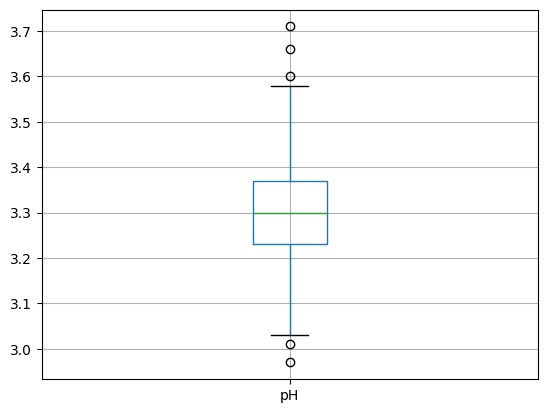

In [ ]:
# H0: pH == 3.29
# H1: pH > 3.29

# Kolom pH
pH = dfNoNull['pH']

t, p = stats.ttest_1samp(pH, 3.29, alternative='greater')

# Uji hipotesis
print(f"t: {t}, p: {p}")
if t > 1.645:
  print("Nilai uji di dalam daerah kritis")
else:
  print("Nilai uji di luar daerah kritis")
if p < 0.05:
    print("H0 ditolak, H1 diterima")
else:
    print("H0 diterima, H1 ditolak")

# Visualisasi boxplot
print()

dfNoNull.boxplot(['pH'])
plt.show()

<u>**4b**</u>

Nilai rata-rata Residual Sugar tidak sama dengan 2.50?


1.   H0: Rata-rata Residual Sugar == 2.50
2.   H1: Rata-rata Residual Sugar != 2.50
3. α = 0.05
4. Metode yang digunakan adalah 1-sample t\-test secara two-sided karena ingin membandingkan rata\-rata sebuah sampel dengan sebuah nilai tertentu, apakah nilai rata-rata tersebut sama atau tidak. Digunakan nilai t<sub>α/2</sub> = 1.960. Critical region (left-tailed and right-tailed): t < -1.960 atau t > 1.960
5. t: 2.1479619435539523, p-value: 0.031956726708616774
6. Tolak H0

Jadi, nilai rata-rata Residual Sugar tidak sama dengan 2.50.


t: 2.1479619435539523, p: 0.031956726708616774
Nilai uji di dalam daerah kritis
H0 ditolak, H1 diterima



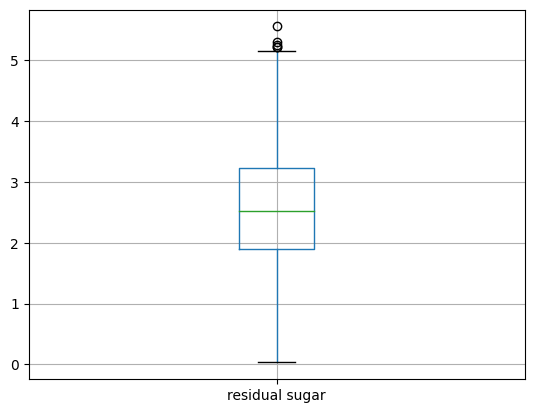

In [ ]:
# H0: Residual Sugar == 2.50
# H1: Residual Sugar != 2.50

# Kolom Residual Sugar
residual_sugar = dfNoNull['residual sugar']

t, p = stats.ttest_1samp(residual_sugar, 2.50)
print(f"t: {t}, p: {p}")

# Uji hipotesis
if t > 1.960 or t < -1.960:
  print("Nilai uji di dalam daerah kritis")
else:
  print("Nilai uji di luar daerah kritis")
if p < 0.05:
    print("H0 ditolak, H1 diterima")
else:
    print("H0 diterima, H1 ditolak")

# Visualisasi boxplot
print()

dfNoNull.boxplot(['residual sugar'])
plt.show()

<u>**4c**</u>

Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?


1. H0: Rata-rata 150 baris pertama kolom sulphates == 0.65
2. H1: Rata-rata 150 baris pertama kolom sulphates != 0.65
3. α = 0.05
4. Metode yang digunakan adalah 1-sample t\-test secara two-sided karena ingin membandingkan rata\-rata sebuah sampel dengan sebuah nilai tertentu, apakah nilai rata-rata tersebut sama atau tidak. Digunakan nilai t<sub>α/2</sub> = 1.960. Critical region (left-tailed and right-tailed): t < -1.960 atau t > 1.960
5. t: -4.964843393315917, p-value: 1.8590151212371923e-06
6. Tolak H0

Jadi, nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65.

t: -4.964843393315917, p: 1.8590151212371923e-06
Nilai uji di dalam daerah kritis
H0 ditolak, H1 diterima



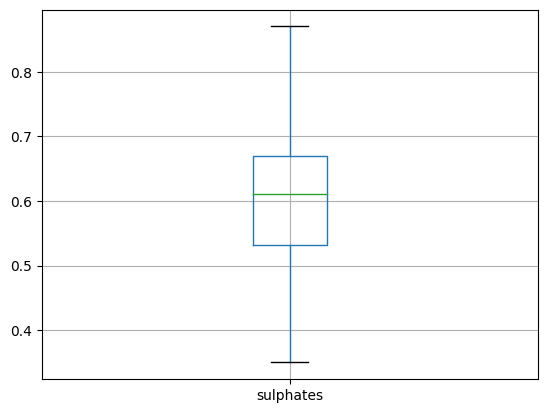

In [ ]:
# H0: sulphates == 0.65
# H1: sulphates != 0.65

# Kolom sulphates
sulphates = dfNoNull['sulphates'].head(150)

t, p = stats.ttest_1samp(sulphates, 0.65)
print(f"t: {t}, p: {p}")

# Uji hipotesis
if t > 1.960 or t < -1.960:
  print("Nilai uji di dalam daerah kritis")
else:
  print("Nilai uji di luar daerah kritis")
if p < 0.05:
    print("H0 ditolak, H1 diterima")
else:
    print("H0 diterima, H1 ditolak")

# Visualisasi boxplot
print()

dfNoNull[:150].boxplot(['sulphates'])
plt.show()

<u>**4d**</u>

Nilai rata-rata total sulfur dioxide di bawah 35?


1. H0: Rata-rata total sulfur dioxide == 35
2. H1: Rata-rata total sulfur dioxide < 35
3. α = 0.05
4. Metode yang digunakan adalah 1-sample t\-test secara one-sided karena ingin membandingkan rata\-rata sebuah sampel dengan sebuah nilai tertentu, apakah nilai rata-rata tersebut lebih kecil atau tidak. Digunakan nilai t<sub>α</sub> = 1.645. Critical region: t < -1.645
5. t: 16.786387372296744, p-value: 1.0
6. Jangan tolak H0

Jadi, nilai rata-rata total sulfur dioxide sama dengan 35.

t: 16.786387372296744, p: 1.0
Nilai uji di luar daerah kritis
H0 diterima, H1 ditolak



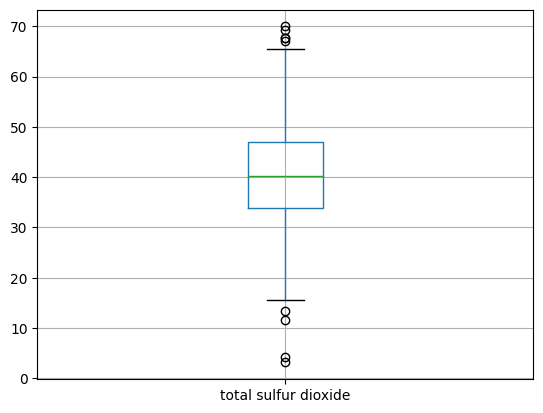

In [ ]:
# H0: sulfur dioxide == 35
# H1: sulfur dioxide < 35

# Kolom sulfur dioxide
sulfur_dioxide = dfNoNull['total sulfur dioxide']

t, p = stats.ttest_1samp(sulfur_dioxide, 35, alternative='less')
print(f"t: {t}, p: {p}")

# Uji hipotesis
if t < -1.645:
  print("Nilai uji di dalam daerah kritis")
else:
  print("Nilai uji di luar daerah kritis")
if p < 0.05:
    print("H0 ditolak, H1 diterima")
else:
    print("H0 diterima, H1 ditolak")

# Visualisasi boxplot
print()

dfNoNull.boxplot(['total sulfur dioxide'])
plt.show()

<u>**4e**</u>

Proporsi nilai total sulfur dioxide yang lebih dari 40, adalah tidak sama dengan 50%?


1. H0: p == 0.5
2. H1: p != 0.5
3. α = 0.05
4. Metode yang digunakan adalah 1-sample z\-test secara two-sided karena ingin membandingkan proporsi sebuah variabel dengan sebuah nilai tertentu, apakah nilai proporsi tersebut sama atau tidak. Digunakan nilai z<sub>α/2</sub> = 1.960. Critical region (left-tailed and right-tailed): z < -1.960 atau z > 1.960
5. z: 0.7589466384404118, p_value: 0.4478844782641115
6. Jangan tolak H0

Jadi, proporsi nilai total sulfur dioxide yang lebih dari 40, adalah sama dengan 50%.


l: 1000, l0: 512
z: 0.7589466384404118, p_value: 0.4478844782641115
Nilai uji di luar daerah kritis
H0 diterima, H1 ditolak



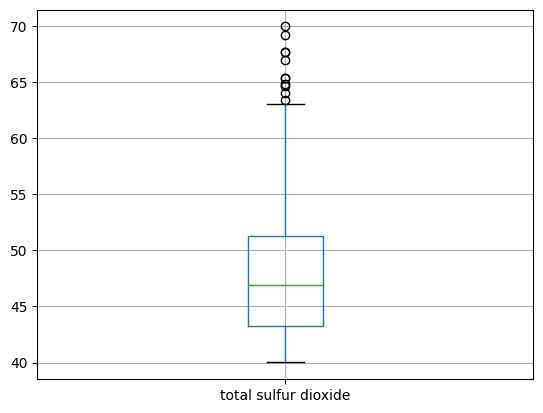

In [ ]:
# H0: p == 0.5
# H1: p != 0.5

# Kolom sulfur dioxide
sulfur_dioxide = dfNoNull['total sulfur dioxide'][dfNoNull['total sulfur dioxide'] > 40]

# Proporsi sulfur dioxide
l = len(dfNoNull['total sulfur dioxide'])
l0 = len(sulfur_dioxide)
print(f"l: {l}, l0: {l0}")
p_hat = l0 / l

# Nilai z
z = (p_hat - 0.5) / py.sqrt((0.5 * (1 - 0.5)) / l)
p_value = 2 * stats.norm.cdf(-abs(z))

# Uji hipotesis
print(f"z: {z}, p_value: {p_value}")
if z > 1.960 or z < -1.960:
  print("Nilai uji di dalam daerah kritis")
else:
  print("Nilai uji di luar daerah kritis")
if p_value < 0.05:
    print("H0 ditolak, H1 diterima")
else:
    print("H0 diterima, H1 ditolak")

# Visualisasi boxplot
print()

morethan40 = dfNoNull[dfNoNull["total sulfur dioxide"] > 40]
morethan40.boxplot(['total sulfur dioxide'])
plt.show()

Perhitungan di atas menggunakan rumus (N besar):


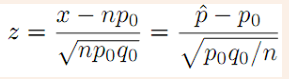

<u>**Analisis 5**</u>

Melakukan test hipotesis 2 sampel,

a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata\-rata kedua bagian tersebut sama?

b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata\-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

c. Benarkah rata\-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata\-rata 25 baris pertama kolom Sulphates ?

d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?



<u>**5a**</u>

Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata\-rata kedua bagian tersebut sama?

1. H0: Rata\-rata bagian awal kolom fixed acidity = Rata\-rata bagian akhir fixed acidity
2. H1: Rata\-rata bagian awal kolom fixed acidity ≠ Rata\-rata bagian akhir fixed acidity
3. α = 0.05
4. Metode yang digunakan adalah independent samples t\-test secara two-sided karena ingin membandingkan rata\-rata dua buah sampel yang berbeda, dan simpangan baku kedua sampel tidak diketahui. Digunakan nilai t<sub>α/2</sub> = 1.960. Critical region (left-tailed and right-tailed): t < -1.960 atau t > 1.960
5. Nilai uji = 0.0260410700, p-value = 0.9792297864
6. Jangan tolak H0

Jadi, rata-rata bagian awal kolom fixed acidity sama dengan rata-rata bagian akhir kolom fixed acidity.



Nilai uji (t) = 0.0260410700, p = 0.9792297864
Jangan tolak H0 karena nilai uji tidak berada pada critical region
Jangan tolak H0 karena p-value lebih besar atau sama dengan α



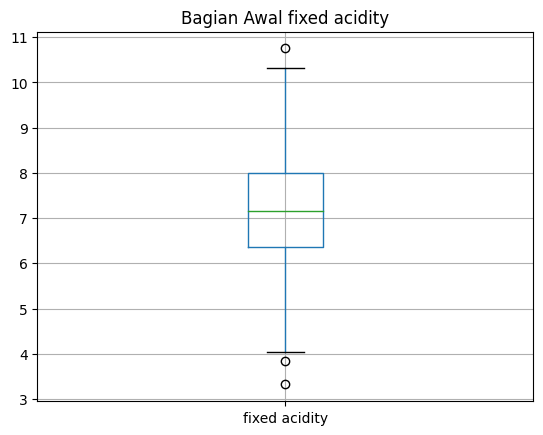

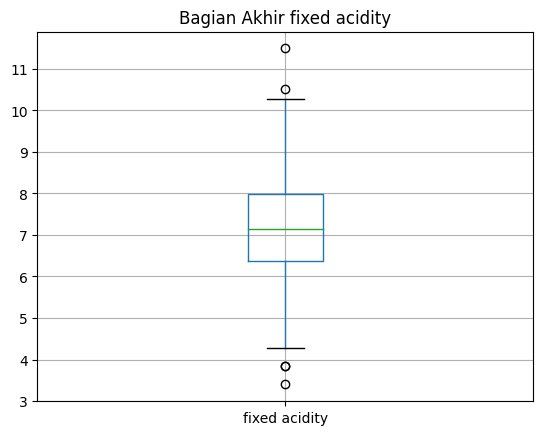

In [ ]:
# Untuk mendapatkan jawaban 5 dan 6

# Bagi kolom "fixed acidity" menjadi dua
divider = int (dfNoNull["fixed acidity"].count() / 2)
bagAwal = dfNoNull.iloc[:divider, :]
bagAwalFA = bagAwal["fixed acidity"]
bagAkhir = dfNoNull.iloc[divider:, :]
bagAkhirFA = bagAkhir["fixed acidity"]

# Hitung nilai uji dan p-value menggunakan library stats dari scipy
t, p = stats.ttest_ind(bagAwalFA, bagAkhirFA)
print("Nilai uji (t) = %.10f, p = %.10f" %(t, p))
if (t < -1.960 or t > 1.960):
    print("Tolak H0 karena nilai uji berada pada critical region")
else:
    print("Jangan tolak H0 karena nilai uji tidak berada pada critical region")
if (p < 0.05):
    print("Tolak H0 karena p-value lebih kecil dibanding α")
else:
    print("Jangan tolak H0 karena p-value lebih besar atau sama dengan α")

# Visualisasi boxplot
print()

df[:divider].boxplot(["fixed acidity"])
plt.title("Bagian Awal fixed acidity")
plt.show()

print()
df[divider:].boxplot(["fixed acidity"])
plt.title("Bagian Akhir fixed acidity")
plt.show()

<u>**5b**</u>

Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

1. H0: Rata\-rata bagian awal kolom chlorides - Rata\-rata bagian akhir fixed acidity = 0.001
2. H1: Rata\-rata bagian awal kolom chlorides - Rata\-rata bagian akhir chlorides > 0.001
3. α = 0.05
4. Metode yang digunakan adalah independent samples t\-test secara one-sided karena ingin membandingkan rata\-rata dua buah sampel yang berbeda, dan simpangan baku kedua sampel tidak diketahui. Digunakan nilai t<sub>α</sub> = 1.645. Critical region: t > 1.645
5. Nilai uji = -0.4673171229, p-value = 0.6403750213
6. Jangan tolak H0

Jadi, rata-rata bagian awal kolom chlorides lebih besar daripada bagian akhir sebesar 0.001.

Nilai uji (t) = -0.4673171229, p = 0.6403750213
Jangan tolak H0 karena nilai uji tidak berada pada critical region
Jangan tolak H0 karena p-value lebih besar atau sama dengan α



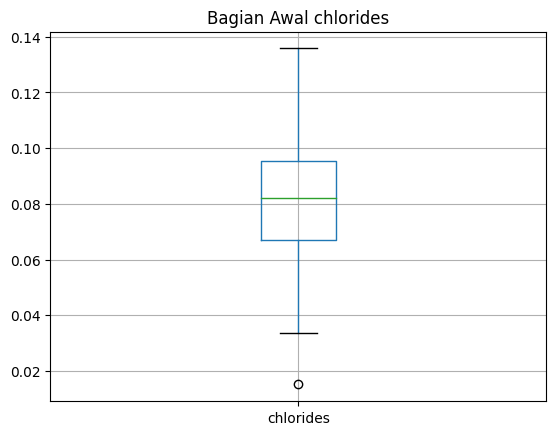

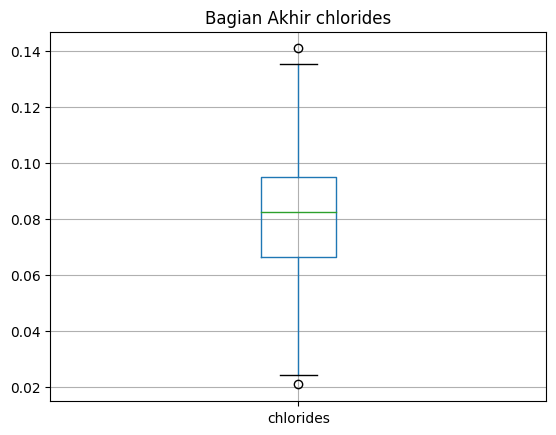

In [ ]:
# Untuk mendapatkan jawaban 5 dan 6

# Bagi kolom "chlorides" menjadi dua
divider = int (dfNoNull["chlorides"].count() / 2)
bagAwal = dfNoNull.iloc[:divider, :]
bagAwalChlorides = bagAwal["chlorides"]
bagAkhir = dfNoNull.iloc[divider:, :]
bagAkhirChlorides = bagAkhir["chlorides"]

# Perhitungan secara manual karena library biasa tidak dapat mengkomputasikan nilai d0 nonzero
n1 = bagAwalChlorides.count()
n2 = bagAkhirChlorides.count()
var1 = bagAwalChlorides.var()
var2 = bagAkhirChlorides.var()
sp2 = (var1 * (n1 - 1) + var2 * (n2 -1)) / (n1 + n2 - 2)

sp = py.sqrt(sp2)
d0 = 0.001
x1 = bagAwalChlorides.mean()
x2 = bagAkhirChlorides.mean()

t = (x1 - x2 - d0) / (sp * py.sqrt(1/n1 + 1/n2)) # Hitung t-value
p = (1 - stats.t.cdf(x=abs(t), df = n1 + n2 - 2)) * 2 # Dikali dua karena two-sided, degrees of freedom = 498

print("Nilai uji (t) = %.10f, p = %.10f" %(t, p))

if (t > 1.645):
    print("Tolak H0 karena nilai uji berada pada critical region")
else:
    print("Jangan tolak H0 karena nilai uji tidak berada pada critical region")
if (p < 0.05):
    print("Tolak H0 karena p-value lebih kecil dibanding α")
else:
    print("Jangan tolak H0 karena p-value lebih besar atau sama dengan α")

# Visualisasi boxplot
print()

df[:divider].boxplot(["chlorides"])
plt.title("Bagian Awal chlorides")
plt.show()

print()
df[divider:].boxplot(["chlorides"])
plt.title("Bagian Akhir chlorides")
plt.show()


Perhitungan di atas menggunakan rumus berikut:

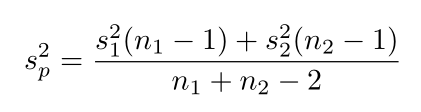
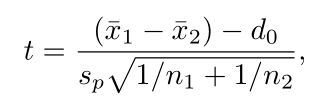

<u>**5c**</u>

Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan
rata-rata 25 baris pertama kolom Sulphates ?

1. H0: Rata\-rata 25 baris pertama kolom Volatile Acidity = Rata\-rata 25 baris pertama kolom sulphates
2. H1: Rata\-rata 25 baris pertama kolom Volatile Acidity ≠ Rata\-rata 25 baris pertama kolom sulphates
3. α = 0.05
4. Metode yang digunakan adalah independent samples t\-test secara two-sided karena ingin membandingkan rata\-rata dua buah sampel yang berbeda. Digunakan nilai t<sub>α/2</sub> = 1.960. Critical region (left-tailed and right-tailed): t < -1.960 atau t > 1.960 (anggap saja derajat kebebasan mendekati infinity)
5. Nilai uji = -2.6374821677, p-value = 0.0112230582
6. Tolak H0

Jadi, rata-rata sampel 25 baris pertama kolom Volatile Acidity nilainya berbeda dengan rata-rata 25 baris pertama kolom Sulphates


Nilai uji (t) = -2.6374821677, p = 0.0112230582
Tolak H0 karena nilai uji berada pada critical region
Tolak H0 karena p-value lebih kecil dibanding α



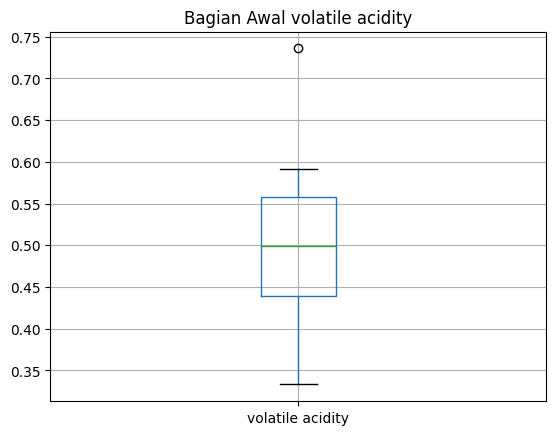

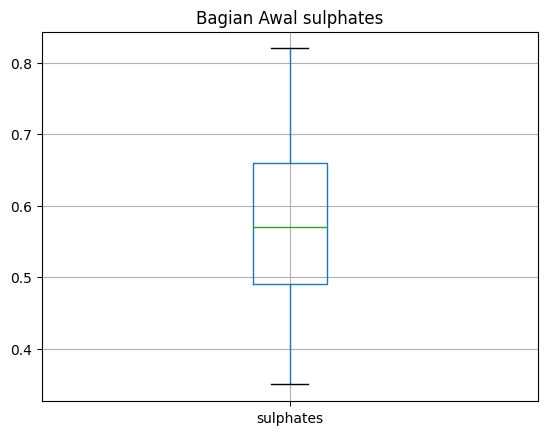

In [ ]:
# Untuk mendapatkan jawaban 5 dan 6

# Dapatkan 25 baris pertama volatile acidity dan sulphates
bagAwal = dfNoNull.iloc[:25, :]
bagAwalVA = bagAwal["volatile acidity"]
bagAwalSulphates = bagAwal["sulphates"]

# Hitung nilai uji dan p-value menggunakan library stats dari scipy
t, p = stats.ttest_ind(bagAwalVA, bagAwalSulphates)
print("Nilai uji (t) = %.10f, p = %.10f" %(t, p))
if (t < -1.960 or t > 1.960):
    print("Tolak H0 karena nilai uji berada pada critical region")
else:
    print("Jangan tolak H0 karena nilai uji tidak berada pada critical region")
if (p < 0.05):
    print("Tolak H0 karena p-value lebih kecil dibanding α")
else:
    print("Jangan tolak H0 karena p-value lebih besar atau sama dengan α")

# Visualisasi boxplot
print()

df[:25].boxplot(["volatile acidity"])
plt.title("Bagian Awal volatile acidity")
plt.show()

print()
df[:25].boxplot(["sulphates"])
plt.title("Bagian Awal sulphates")
plt.show()

<u>**5d**</u>

Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

1. H0: Variansi bagian awal kolom residual sugar = Variansi bagian akhir kolom residual sugar
2. H1: Variansi bagian awal kolom residual sugar ≠ Variansi bagian akhir kolom residual sugar
3. α = 0.05
4. Metode yang digunakan adalah f-test karena ingin membandingkan variansi dua buah sampel yang berbeda. Critical region: f < 0.90134 atau f > 1.19206
5. Nilai uji (f) = 0.9420041067, p-value = 0.7475898202
6. Jangan tolak H0

Jadi, bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya.



In [ ]:
# Untuk mendapatkan jawaban 4
atas = stats.f.ppf(1 - 0.05/2, divider - 1, divider - 1)
bawah = stats.f.ppf(0.05 / 1, 1005 - 1, 1005 - 1)
print("Critical region = f < %.5f atau f > %.5f" %(bawah, atas))

Critical region = f < 0.90134 atau f > 1.19206


Nilai uji (f) = 0.9420041067, p = 0.7475898202
Jangan tolak H0 karena nilai uji tidak berada pada critical region
Jangan tolak H0 karena p-value lebih besar atau sama dengan α



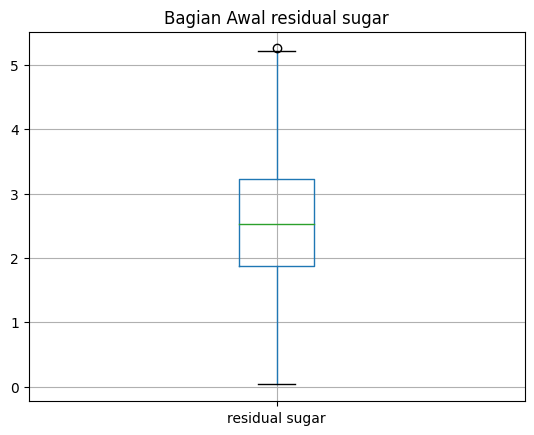

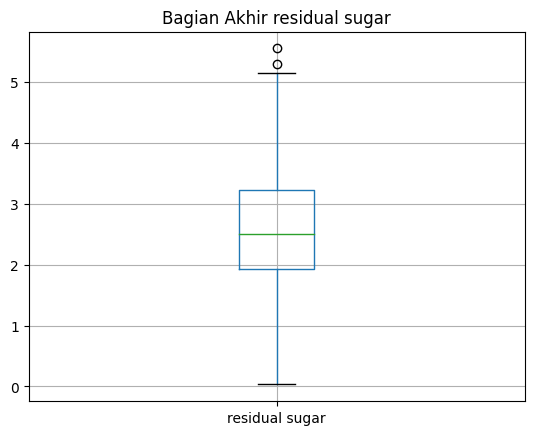

In [ ]:
# Untuk mendapatkan jawaban 5 dan 6

# Bagi kolom "residual sugar" menjadi dua
divider = int (dfNoNull["residual sugar"].count() / 2)
bagAwal = dfNoNull.iloc[:divider, :]
bagAwalRS = bagAwal["residual sugar"]
bagAkhir = dfNoNull.iloc[divider:, :]
bagAkhirRS = bagAkhir["residual sugar"]



# Hitung secara manual
f = bagAwalRS.var() / bagAkhirRS.var()
dfn = bagAwalRS.count() - 1 # Degrees of freedom numerator = 499
dfd = bagAkhirRS.count() - 1 # Degrees of freedom denumerator = 499
p = (1 - stats.f.cdf(f, dfn, dfd))

print("Nilai uji (f) = %.10f, p = %.10f" %(f, p))
if (f < 0.90134 or f > 1.19206):
    print("Tolak H0 karena nilai uji berada pada critical region")
else:
    print("Jangan tolak H0 karena nilai uji tidak berada pada critical region")
if (p < 0.10):
    print("Tolak H0 karena p-value lebih kecil dibanding α")
else:
    print("Jangan tolak H0 karena p-value lebih besar atau sama dengan α")

# Visualisasi boxplot
print()

df[:divider].boxplot(["residual sugar"])
plt.title("Bagian Awal residual sugar")
plt.show()

print()
df[divider:].boxplot(["residual sugar"])
plt.title("Bagian Akhir residual sugar")
plt.show()


<u>**5e**</u>

Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

1. H0: Proporsi nilai setengah bagian awal alcohol yang lebih dari 7 = Proporsi nilai setengah bagian akhir alcohol
2. H1: Proporsi nilai setengah bagian awal alcohol yang lebih dari 7 > Proporsi nilai setengah bagian akhir alcohol
3. α = 0.05
4. Metode yang digunakan adalah independent samples z-test secara one-sided karena ingin membandingkan proporsi dua buah sampel yang berbeda. Digunakan nilai z<sub>α</sub> = 1.645. Critical region: z > 1.645
5. Nilai uji (z) = 0.0000000000, p-value = 0.4950000000
6. Jangan tolak H0.

Jadi, proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah sama dengan, proporsi nilai yang sama di setengah bagian akhir alcohol.



Nilai uji (z) = 0.0000000000, p = 0.4950000000
Jangan tolak H0 karena nilai uji tidak berada pada critical region
Jangan tolak H0 karena p-value lebih besar atau sama dengan α



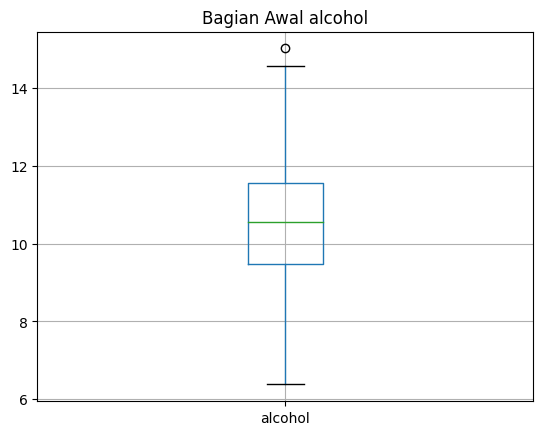

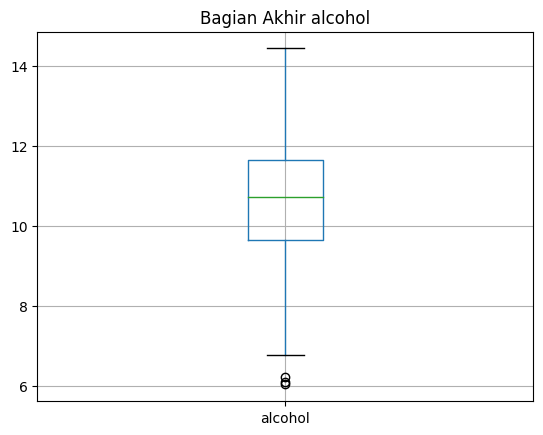

In [ ]:
# Untuk mendapatkan jawaban 5 dan 6

# Bagi kolom "residual sugar" menjadi dua
divider = int (dfNoNull["alcohol"].count() / 2)
bagAwal = dfNoNull.iloc[:divider, :]
bagAwalRS = bagAwal[bagAwal["alcohol"] > 7]
bagAkhir = dfNoNull.iloc[divider:, :]
bagAkhirRS = bagAkhir[bagAkhir["alcohol"] > 7]

p1 = (bagAwalRS["alcohol"].count() / 2)/ divider
p2 = (bagAkhirRS["alcohol"].count() / 2) / divider

p = (bagAwalRS["alcohol"].count() / 2 + bagAkhirRS["alcohol"].count() / 2) / (2 * divider)
q = 1 - p
z = (p1 - p2) / (math.sqrt(p * q * (1/divider + 1/divider)))

print("Nilai uji (z) = %.10f, p = %.10f" %(z, p))
if (z > 1.645):
    print("Tolak H0 karena nilai uji berada pada critical region")
else:
    print("Jangan tolak H0 karena nilai uji tidak berada pada critical region")
if (p < 0.05):
    print("Tolak H0 karena p-value lebih kecil dibanding α")
else:
    print("Jangan tolak H0 karena p-value lebih besar atau sama dengan α")

# Visualisasi boxplot
print()

df[:divider].boxplot(["alcohol"])
plt.title("Bagian Awal alcohol")
plt.show()

print()
df[divider:].boxplot(["alcohol"])
plt.title("Bagian Akhir alcohol")
plt.show()

Perhitungan di atas memakai rumus berikut:


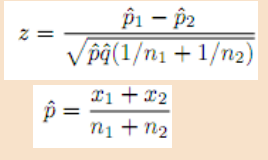